Major libraries used for this:
- transformers, datasets, evaluate, accelerate, gluonts, ujson

**Load the dataset:**
- we use the tourism_monthly dataset containing monthly tourism volumes for 366 regions in Australia

In [1]:
from datasets import load_dataset

/Users/blaise/Documents/ML/Machine-Learning-and-Big-Data-Analytics/venv2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset("monash_tsf", "tourism_monthly")

Generating validation split: 100%|██████████| 366/366 [00:00<00:00, 11197.86 examples/s]


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 366
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 366
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 366
    })
})

as can be seen, the datase† contains 3 sp;its: train, validation, and test.
- each example contains a few keys - of which the most important are start and target

In [5]:
train_example = dataset['train'][0]
train_example.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'])

In [6]:
train_example

{'start': datetime.datetime(1979, 1, 1, 0, 0),
 'target': [1149.8699951171875,
  1053.8001708984375,
  1388.8797607421875,
  1783.3702392578125,
  1921.025146484375,
  2704.94482421875,
  4184.41357421875,
  4148.35400390625,
  2620.72509765625,
  1650.300048828125,
  1115.9200439453125,
  1370.6251220703125,
  1096.31494140625,
  978.4600219726562,
  1294.68505859375,
  1480.465087890625,
  1748.865234375,
  2216.920166015625,
  4690.5185546875,
  4682.8642578125,
  2459.579833984375,
  1484.4901123046875,
  1028.985107421875,
  1109.3648681640625,
  960.8751220703125,
  896.35009765625,
  1118.6551513671875,
  1619.9949951171875,
  1847.994873046875,
  2367.044921875,
  4991.16015625,
  4772.9443359375,
  2894.678466796875,
  1860.4801025390625,
  1185.150146484375,
  1313.659912109375,
  1160.9150390625,
  1061.5048828125,
  1301.77001953125,
  1794.3797607421875,
  2106.455078125,
  2789.034912109375,
  4917.8466796875,
  4994.4833984375,
  3016.754150390625,
  1941.505126953125,
 

- The start simply indicates the start of the timeseries (as a datetime), and the target contains the actual values of the timeseries.
- the start will be useful to add time related features to the timeseries values as extra input to the model such as month of year, since we know the frequency of the data is monthly. we also know for instance the second value has a timestamp of 1979-02-01

In [15]:
print(train_example['start'])

1979-01-01 00:00:00


In [16]:
print(train_example['target'])

[1149.8699951171875, 1053.8001708984375, 1388.8797607421875, 1783.3702392578125, 1921.025146484375, 2704.94482421875, 4184.41357421875, 4148.35400390625, 2620.72509765625, 1650.300048828125, 1115.9200439453125, 1370.6251220703125, 1096.31494140625, 978.4600219726562, 1294.68505859375, 1480.465087890625, 1748.865234375, 2216.920166015625, 4690.5185546875, 4682.8642578125, 2459.579833984375, 1484.4901123046875, 1028.985107421875, 1109.3648681640625, 960.8751220703125, 896.35009765625, 1118.6551513671875, 1619.9949951171875, 1847.994873046875, 2367.044921875, 4991.16015625, 4772.9443359375, 2894.678466796875, 1860.4801025390625, 1185.150146484375, 1313.659912109375, 1160.9150390625, 1061.5048828125, 1301.77001953125, 1794.3797607421875, 2106.455078125, 2789.034912109375, 4917.8466796875, 4994.4833984375, 3016.754150390625, 1941.505126953125, 1234.135009765625, 1378.72021484375, 1182.9749755859375, 1081.6600341796875, 1424.110107421875, 1774.5350341796875, 2115.420166015625, 2804.840087890

In [18]:
len(train_example['target'])

139

The validation set contains the same data as the training set, just for a prediction length longer amount of time. this allows us to validate the model's predictions against ground truth. The test set is again one prediction_length longer than the validation set or some multiple of pred length longer than training set

In [19]:
validation_example = dataset['validation'][0]
validation_example.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'])

initial values are exactly the same as the corresponding training example

In [20]:
print(validation_example['start'])

1979-01-01 00:00:00


In [21]:
print(validation_example['target'])

[1149.8699951171875, 1053.8001708984375, 1388.8797607421875, 1783.3702392578125, 1921.025146484375, 2704.94482421875, 4184.41357421875, 4148.35400390625, 2620.72509765625, 1650.300048828125, 1115.9200439453125, 1370.6251220703125, 1096.31494140625, 978.4600219726562, 1294.68505859375, 1480.465087890625, 1748.865234375, 2216.920166015625, 4690.5185546875, 4682.8642578125, 2459.579833984375, 1484.4901123046875, 1028.985107421875, 1109.3648681640625, 960.8751220703125, 896.35009765625, 1118.6551513671875, 1619.9949951171875, 1847.994873046875, 2367.044921875, 4991.16015625, 4772.9443359375, 2894.678466796875, 1860.4801025390625, 1185.150146484375, 1313.659912109375, 1160.9150390625, 1061.5048828125, 1301.77001953125, 1794.3797607421875, 2106.455078125, 2789.034912109375, 4917.8466796875, 4994.4833984375, 3016.754150390625, 1941.505126953125, 1234.135009765625, 1378.72021484375, 1182.9749755859375, 1081.6600341796875, 1424.110107421875, 1774.5350341796875, 2115.420166015625, 2804.840087890

In [22]:
len(validation_example['target'])

163

this example has prediction_length=24 additional values compared to the training example. 

In [23]:
freq = "1M"
prediction_length = 24

assert len(train_example['target']) + prediction_length == len(validation_example['target'])

lets visualize this:

In [25]:
import matplotlib.pyplot as plt

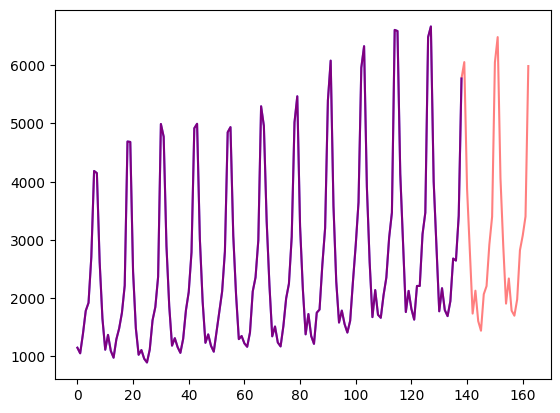

In [28]:
fig, ax = plt.subplots()

ax.plot(train_example['target'], color='blue')
ax.plot(validation_example['target'], color='red', alpha=0.5)

lets split up the data

In [29]:
train_dataset = dataset['train']
test_dataset = dataset['test']

**Update start to pd.Period:**
- the first thing we do is convert the start feature of each timeseries to a pandas period index using the data's freq:

In [31]:
from functools import lru_cache
import pandas as pd
import numpy as np

In [32]:
@lru_cache(10_000)
def convert_to_pandas_period(date, freq):
    return pd.Period(date, freq)

def transform_start_field(batch, freq):
    batch['start'] = [convert_to_pandas_period(date, freq) for date in batch['start']]
    return batch

use the dataset's set_transform to do this transformation on the fly...

In [33]:
from functools import partial

train_dataset.set_transform(partial(transform_start_field, freq=freq))
test_dataset.set_transform(partial(transform_start_field, freq=freq))

**Define the Model:**
- Next, lets instantiate a model.
- specify a couple of additional params to the model
  - the prediction_length (in our case 24 months): this is the horizon that the decoder of the transformer will learn to predict for
  - context_length: the model will set the context_length (input of the encoder) equal to the prediction length if no context_length is specified
  - lags: for a given frequency, these specify how much we look back to be added as additional features, eg. for a daily frequency we might consider a lookback of [1,2,7,30,...] or in other words look back 1,2,... days while for minute data we might consider [1,30,60,60*24,...] etc
  - the number of time features: in our case will be 2  as we'll add a monthofyear and age features
  - the number of static categorical features: in our case this will just be 1 as we'll add a single time series id feature
  - the cardinality: the number of values of each static categorical feature, as a list whill will be 266 as we have 366 diff timeseries
  - the embedding dimension: the embedding dimension for each static categorical feature as alist, for example [3] means the model will learn an embedding vector of size 3 for each of the 366 time series (regions)

In [36]:
train_dataset

Dataset({
    features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
    num_rows: 366
})

lets use the default lags provided by gluonts for the default frequency ("monthly")

In [37]:
from gluonts.time_feature import get_lags_for_frequency

In [38]:
lags_sequence = get_lags_for_frequency(freq)
print(lags_sequence)

[1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 23, 24, 25, 35, 36, 37]


/Users/blaise/Documents/ML/Machine-Learning-and-Big-Data-Analytics/venv2/lib/python3.12/site-packages/gluonts/time_feature/lag.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)


the above means we'll look back up to 37 months for each timestep as additional features..

check the default time features gluonts provides

In [40]:
from gluonts.time_feature import time_features_from_frequency_str
time_features = time_features_from_frequency_str(freq)
print(time_features)

[<function month_of_year at 0x1410a54e0>]


/Users/blaise/Documents/ML/Machine-Learning-and-Big-Data-Analytics/venv2/lib/python3.12/site-packages/gluonts/time_feature/_base.py:249: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)


In [ ]:
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformer